# Week 5

### 01 Assignment

[The assignment can be found here.](https://github.com/Hartmannsolution/docker_notebooks/blob/master/notebooks/05-Exercise.ipynb)

### 02 Status

I completed the necessary exercises.

### 03 Solutions
#### Exercise 1

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
# 5.A
url = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?lang=en&delimiter=Semicolon&Tid=2008K1%2C2020K4&CIVILSTAND=F'
df_a = pd.read_csv(url, sep=';')
divorced_2008 = df_a.iloc[0,2]
divorced_2020 = df_a.iloc[1,2]
pct_change = ((divorced_2020/divorced_2008) - 1) * 100
change_type = 'increased' if pct_change >= 0 else 'decreased'
print('The amount of divorced danes has %s by %.2f %%' % (change_type, pct_change))

The amount of divorced danes has increased by 28.81 %


In [20]:
# 5.B
url = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?lang=en&delimiter=Semicolon&OMR%C3%85DE=*&CIVILSTAND=TOT%2CU&Tid=2020K4'
df_b = pd.read_csv(url, sep=';')
cities_mask = df_b[(df_b[:]['OMRÅDE'] != 'All Denmark') & (df_b[:]['OMRÅDE'].str.contains('Region') == False)]
status_total = cities_mask[cities_mask[:]['CIVILSTAND'] == 'Total']
status_never_married = cities_mask[cities_mask[:]['CIVILSTAND'] == 'Never married']

five_biggest_cities = status_total.sort_values('INDHOLD', ascending=False)[:5]

highest_pct = {'area': '', 'pct': 0}
for area in five_biggest_cities['OMRÅDE']:
    no_people = int(five_biggest_cities[(five_biggest_cities['OMRÅDE'] == area)]['INDHOLD'])
    no_never_married = int(status_never_married[(status_never_married['OMRÅDE'] == area)]['INDHOLD'])
    pct = (no_never_married/no_people) * 100
    if pct > highest_pct['pct']:
        highest_pct['area'] = area
        highest_pct['pct'] = pct
print(highest_pct)

{'area': 'Copenhagen', 'pct': 65.4896415941411}


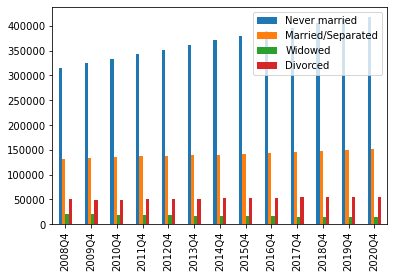

In [28]:
# 5.C
url = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?lang=en&delimiter=Semicolon&OMR%C3%85DE=101&Tid=*&CIVILSTAND=U%2CG%2CE%2CF'
df_c = pd.read_csv(url, sep=';')
year_end = df_c[df_c['TID'].str.endswith('Q4')]
index = year_end['TID'].unique()
never_married = list(year_end[year_end['CIVILSTAND'] == 'Never married']["INDHOLD"])
married_separated = list(year_end[year_end['CIVILSTAND'] == 'Married/separated']["INDHOLD"])
widowed = list(year_end[year_end['CIVILSTAND'] == 'Widowed']["INDHOLD"])
divorced = list(year_end[year_end['CIVILSTAND'] == 'Divorced']["INDHOLD"])
dt = pd.DataFrame(
    {
        'Never married':never_married,
        'Married/Separated':married_separated,
        'Widowed':widowed,
        'Divorced':divorced
    }, index=index)
dt.plot.bar()

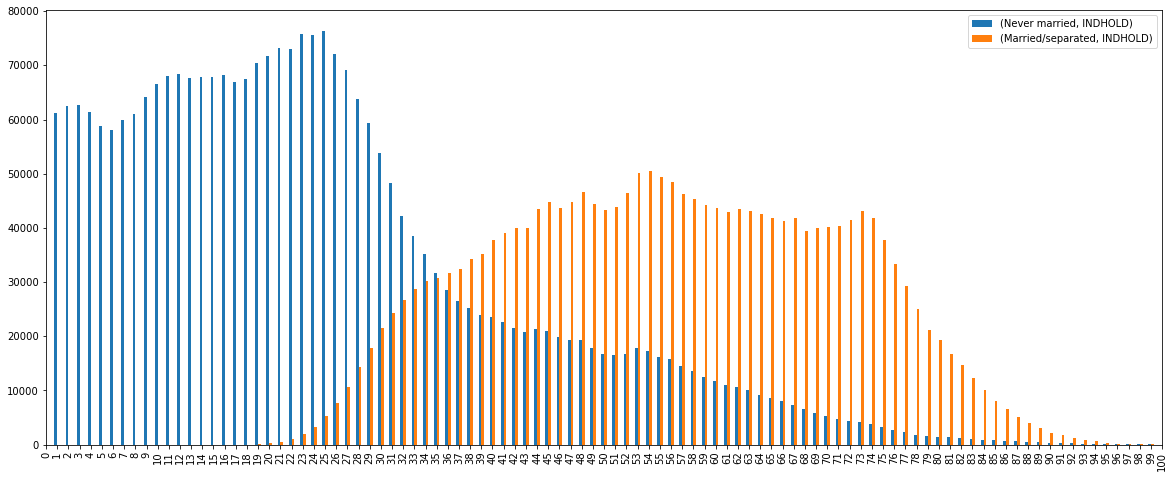

In [40]:
# 5.D
url = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?lang=en&delimiter=Semicolon&CIVILSTAND=U%2CG&Tid=2020K3&ALDER=*'
df_d = pd.read_csv(url, sep=';')
never_married = df_d[(df_d[:]['CIVILSTAND'] == 'Never married') & (df_d[:]['ALDER'] != 'Total')].reset_index(drop=True)
married_separated = df_d[(df_d[:]['CIVILSTAND'] == 'Married/separated') & (df_d[:]['ALDER'] != 'Total')].reset_index(drop=True)
dt = pd.concat([never_married, married_separated], axis=1, keys=['Never married','Married/separated'])

dt.plot.bar(figsize=(20,8))
plt.xlim(0,100)
plt.legend()